# Kicked Rotor

This code was created by Guilherme Vieira (@guilhermewells/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful).


This is a 1D rotor, periodically kicked with a position-dependent amplitude.The Hamiltonian is given by:

\begin{align}
H 
&= {p^2\over 2I} + k \cos(\theta)\sum_{n=-\infty}^\infty \delta(t-n\tau)
\end{align}

It could be understood as a particle moving into a ring receiving some kicks eventualy in its direction. We can analyze the system by a stroboscopic point of view, building a Poincaré map by picturing the evolution once every period. The standard map can give the relation between the coordinates in phase space before the n'th kick and just before the (n+1)'th kick.


\begin{align}
p_{n+1} 
&= 
p_n + k\sin\theta_{n}
\\
\theta_{n+1} 
&=
\theta_n + {T\over I} p_{n+1}
\end{align}
or, alternatively,
\begin{align}
\theta_{n+1} 
&=
\theta_n + {T\over I} p_n
\\
p_{n+1} 
&= 
p_n + k\sin\theta_{n+1}
\end{align}

https://en.wikipedia.org/wiki/Kicked_rotator

http://www.scholarpedia.org/article/Chirikov_standard_map

https://boulderschool.yale.edu/sites/default/files/files/Delande-kicked_rotor_lectures_1_and_2.pdf

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=10., 10.

In [102]:
#strenth of the kick on the system
k=0.5
T=1

#how many points one trajectory should have, each trajectory will be a line, and each line will have this number of points
Points=1000
Traj=200

#initialization of size, without this the following section only works until 100 trajectories, sugestion ?
p=np.zeros((Points, Traj))
x=np.zeros((Points, Traj))

#initialization of random values for x and p, angular variables, values are modulated in range of 2pi

x[0,:]=np.random.rand(Traj)*2.*np.pi
p[0,:]=np.random.rand(Traj)*2.*np.pi

#function that defines the standard map mentioned above, for each trajectory the iteration goes for the number of points
def KT(x,p):
    for j in range(0,Traj):        
        for n in range(Points-1):
            x[n+1,j]=x[n,j]+T*p[n,j]
            p[n+1,j]=T*p[n,j]+T*k*np.sin(x[n+1,j])
#the function return a value that is then divided by 2pi to assure that it belongs to a single round along a ring            
    return np.mod(x,2.*np.pi),np.mod(p,2.*np.pi)

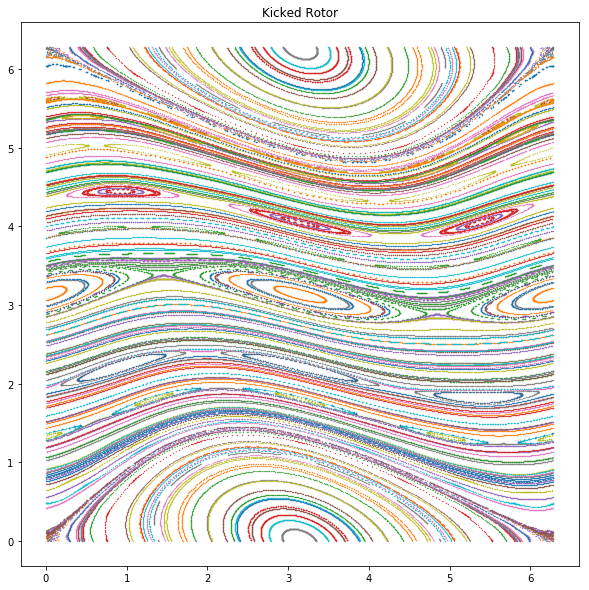

In [103]:
#ploting the mapping
x,p=KT(x,p)
plt.plot(x,p,'.', markersize=0.5)
plt.title('Kicked Rotor')
plt.show()

In [104]:
matplotlib.rcParams['figure.figsize']=15., 15.
T=1
#how many points one trajectory should have, each trajectory will be a line, and each line will have this number of points
Points=1000
Traj=200
#initialization of size, without this the following section only works until 100 trajectories, sugestion ?
p=np.zeros((Points, Traj))
x=np.zeros((Points, Traj))
#function that defines the standard map mentioned above, for each trajectory the iteration goes for the number of points
#here the kick is an argument of the function
def KT(x,p,k):
    #initialization of random values for x and p, angular variables, values are modulated in range of 2pi
    x[0,:]=np.random.rand(Traj)*2.*np.pi
    p[0,:]=np.random.rand(Traj)*2.*np.pi
    for j in range(0,Traj):        
        for n in range(Points-1):
            x[n+1,j]=x[n,j]+T*p[n,j]
            p[n+1,j]=T*p[n,j]+T*k*np.sin(x[n+1,j])           
#the function return a value that is then divided by 2pi to assure that it belongs to a single round along a ring                        
    return np.mod(x,2.*np.pi),np.mod(p,2.*np.pi)
#our kick here goes into a variety of values in a array
e = 0
k = np.array([0.,0.5,0.97,5.])
k = karray[e]
x,p = KT(x,p,k)

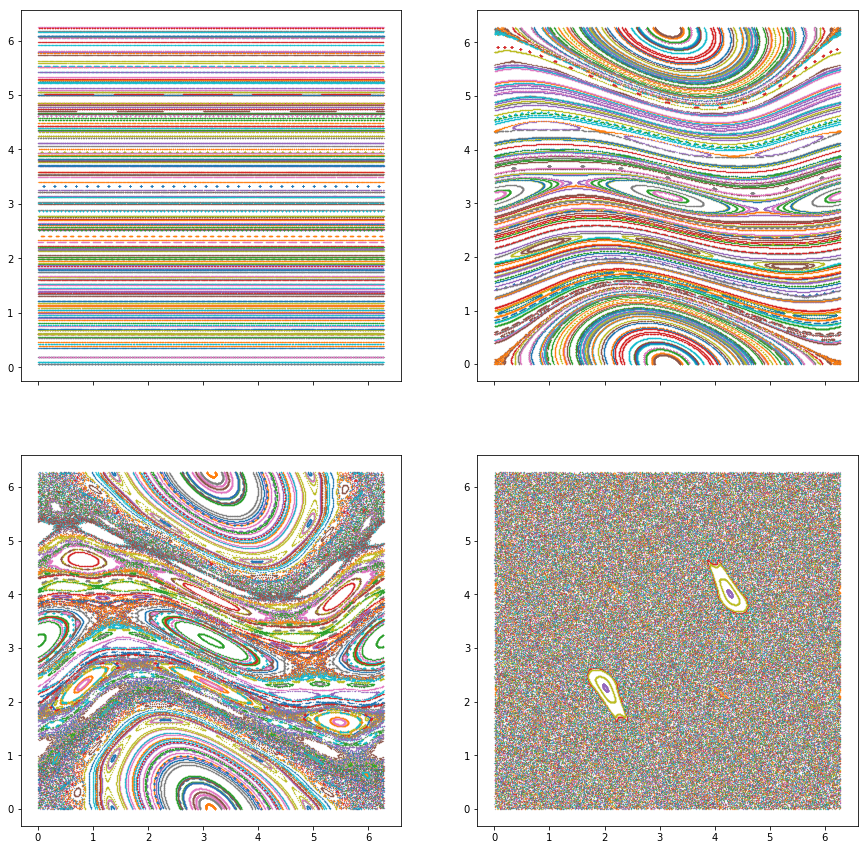

In [105]:
#ploting the map for diferent values of kicks in a single figure
fig, axes = plt.subplots(int(len(karray)/2),int(len(karray)/2), sharex=True)
#the loops are for the subplots, there should be a easier way of doing it...
for l in range(int(len(karray)/2)):
    for o in range(int(len(karray)/2)): 
        k = karray[e]
        e += 1
        x,p = KT(x,p,k)
        axes[l,o].plot(x,p,'.', markersize=0.5 )